# Exploratory Data Analysis and Visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/moods_2024_2025.csv')

In [3]:
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')

In [4]:
df.head(2)

,full_date,weekday,time,mood,activities,mood_numeric,month,year,weekday_numeric,time_decimal,...,Sin dormir,Skin care,Sueño malo,Sueño medio,Sueño temprano,Tarea,Triste,Vacaciones,Viaje,Visita
0,2024-01-01,Monday,1:56 PM,Meh,"['Relajado', 'Aburrido', 'Sueño medio']",2,1,2024,0,13.93,...,0,0,0,1,0,0,0,0,0,0
1,2024-01-02,Tuesday,8:17 PM,Bien,"['Feliz', 'Relajado', 'Contento', 'Sueño medio...",3,1,2024,1,20.28,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   full_date                457 non-null    datetime64[ns]
 1   weekday                  457 non-null    object        
 2   time                     457 non-null    object        
 3   mood                     457 non-null    object        
 4   activities               457 non-null    object        
 5   mood_numeric             457 non-null    int64         
 6   month                    457 non-null    int64         
 7   year                     457 non-null    int64         
 8   weekday_numeric          457 non-null    int64         
 9   time_decimal             457 non-null    float64       
 10  sleep_level              457 non-null    object        
 11  sleep_level_numeric      457 non-null    int64         
 12  activities_count         457 non-nul

In [6]:
df.describe()

,full_date,mood_numeric,month,year,weekday_numeric,time_decimal,sleep_level_numeric,activities_count,emotions_count,health_count,...,Sin dormir,Skin care,Sueño malo,Sueño medio,Sueño temprano,Tarea,Triste,Vacaciones,Viaje,Visita
count,457,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,...,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,2024-09-26 07:02:13.916848896,2.761488,5.260394,2024.343545,3.002188,19.973151,2.317287,8.916849,3.912473,1.901532,...,0.015317,0.455142,0.131291,0.376368,0.004376,0.107221,0.035011,0.021882,0.028446,0.037199
min,2024-01-01 00:00:00,0.000000,1.000000,2024.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-04-24 00:00:00,3.000000,2.000000,2024.000000,1.000000,20.430000,2.000000,7.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-10-21 00:00:00,3.000000,4.000000,2024.000000,3.000000,22.750000,2.000000,9.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2025-02-12 00:00:00,3.000000,9.000000,2025.000000,5.000000,23.100000,3.000000,11.000000,5.000000,3.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2025-06-23 00:00:00,4.000000,12.000000,2025.000000,6.000000,23.980000,4.000000,21.000000,9.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.594201,3.529951,0.475412,2.007113,6.521932,0.762316,3.011979,1.466362,1.681014,...,0.122946,0.498529,0.338088,0.485005,0.066082,0.309733,0.184009,0.146458,0.166427,0.189457


In [7]:
df.describe(include=['O'])

,weekday,time,mood,activities,sleep_level
count,457,457,457,457,457
unique,7,230,5,454,5
top,Monday,10:45 PM,Bien,"['Buen sueño', 'Relajado', 'Contento', 'Ejerci...",Buen sueño
freq,67,101,340,2,215


## Statistics

In [8]:
df.iloc[:, 12:22].describe()

,activities_count,emotions_count,health_count,productivity_count,places_count,tasks_count,school_count,positive_emotions_count,neutral_emotions_count,negative_emotions_count
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.00000,457.000000
mean,8.916849,3.912473,1.901532,1.067834,0.234136,0.376368,0.426696,2.402626,0.43326,1.076586
std,3.011979,1.466362,1.681014,1.191064,0.491032,0.670926,0.731189,1.297701,0.58530,1.299730
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000
50%,9.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.00000,1.000000
75%,11.000000,5.000000,3.000000,2.000000,0.000000,1.000000,1.000000,3.000000,1.00000,2.000000
max,21.000000,9.000000,6.000000,7.000000,2.000000,3.000000,4.000000,6.000000,2.00000,7.000000


In [9]:
print("Number of moods per month 2024")
df[df['year'] == 2024].groupby(['month', 'mood']).size().unstack(fill_value=0)

Number of moods per month 2024


mood,Bien,Horrible,Increíble,Mal,Meh
month,,,,,
1,26,0,0,1,4
2,20,1,0,3,5
3,26,0,0,1,4
4,25,0,0,0,5
5,22,1,1,1,6
6,22,0,0,0,3
8,0,0,1,0,0
9,18,0,3,0,9
10,25,0,0,1,5


In [10]:
print("Number of moods per month 2025")
df[df['year'] == 2025].groupby(['month', 'mood']).size().unstack(fill_value=0) 

Number of moods per month 2025


mood,Bien,Increíble,Mal,Meh
month,,,,
1,26,0,1,4
2,17,2,1,8
3,24,1,1,5
4,20,1,1,3
5,17,2,1,5
6,9,3,1,4


In [11]:
print("Number of moods per day")
df.groupby(['weekday', 'mood']).size().unstack(fill_value=0)

Number of moods per day


mood,Bien,Horrible,Increíble,Mal,Meh
weekday,,,,,
Friday,47,1,0,2,16
Monday,54,0,2,2,9
Saturday,48,0,7,2,9
Sunday,45,1,4,5,10
Thursday,50,0,2,1,13
Tuesday,50,0,0,1,13
Wednesday,46,0,0,5,12


In [12]:
print("Number of moods per every sleep level")
df.groupby(['sleep_level', 'mood']).size().unstack(fill_value=0)

Number of moods per every sleep level


mood,Bien,Horrible,Increíble,Mal,Meh
sleep_level,,,,,
Buen sueño,173,0,6,9,27
Sin dormir,3,0,1,1,2
Sueño malo,35,0,4,4,17
Sueño medio,127,2,4,4,36
Sueño temprano,2,0,0,0,0


In [13]:
print("Relation between mood and number of activities")
df.groupby(['activities_count', 'mood']).size().unstack(fill_value=0).sort_index(ascending=False)

Relation between mood and number of activities


mood,Bien,Horrible,Increíble,Mal,Meh
activities_count,,,,,
21,1,0,0,0,0
17,2,0,0,0,0
16,5,0,0,0,2
15,6,0,0,0,1
14,15,0,0,0,1
13,19,0,0,1,3
12,26,0,0,0,3
11,38,1,1,3,6
10,47,0,2,4,3


## Plots

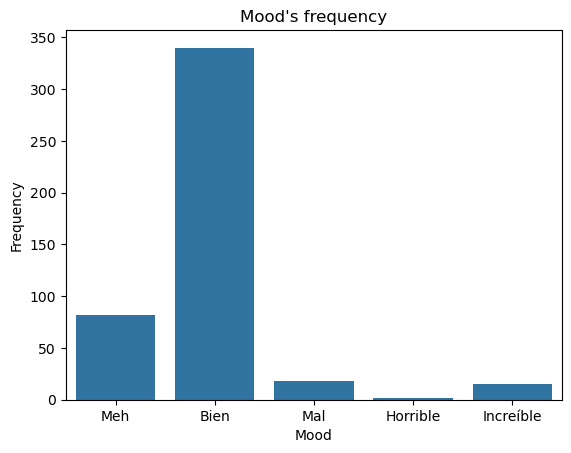

In [14]:
sns.countplot(df, x="mood")
  
plt.xlabel('Mood')
plt.ylabel('Frequency') 
plt.title('Mood\'s frequency')

plt.show()

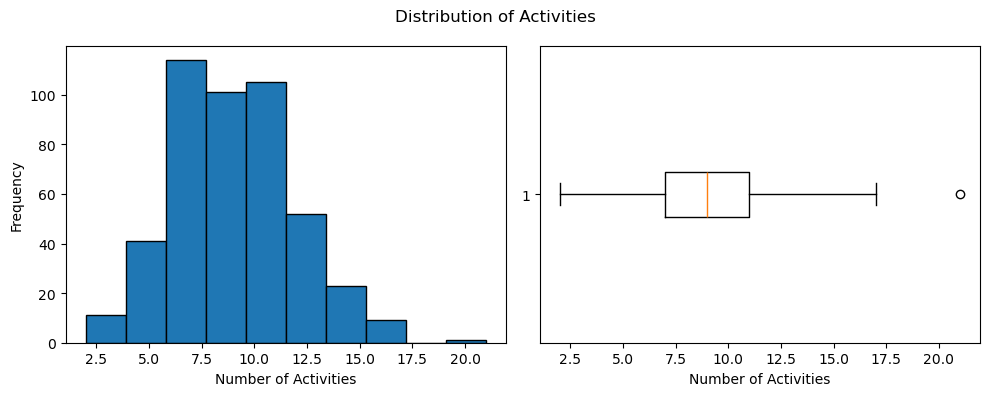

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df['activities_count'], edgecolor='black')
axes[0].set_xlabel('Number of Activities')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(df['activities_count'], vert=False)
axes[1].set_xlabel('Number of Activities')

fig.suptitle('Distribution of Activities')

plt.tight_layout()
plt.show()

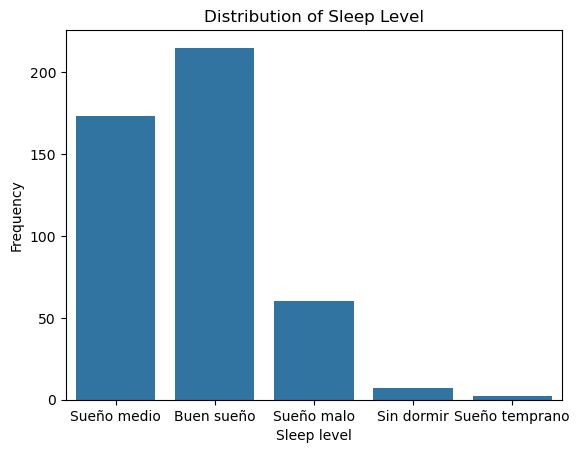

In [16]:
sns.countplot(df, x="sleep_level")
  
plt.xlabel('Sleep level')
plt.ylabel('Frequency') 
plt.title('Distribution of Sleep Level')

plt.show()

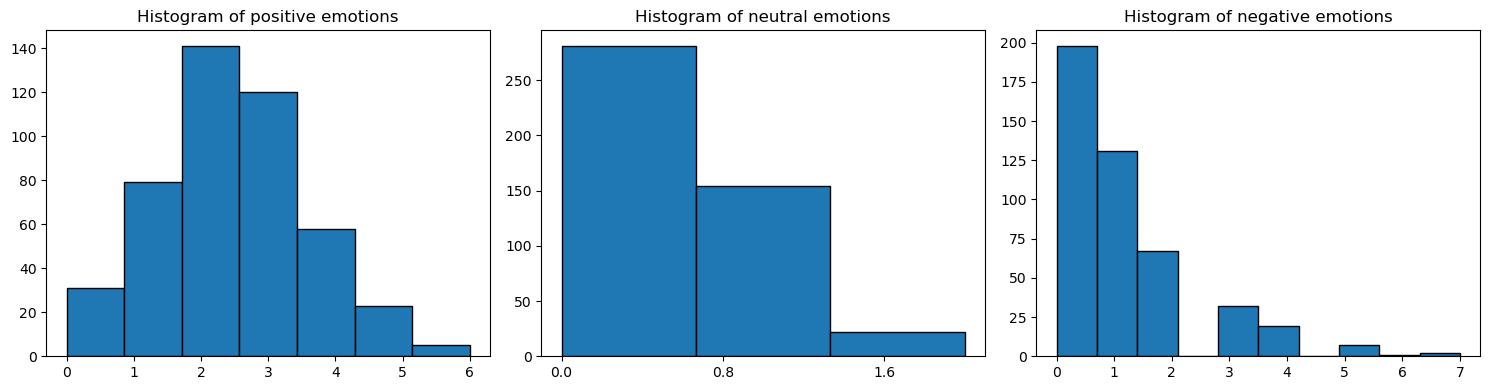

In [17]:
from matplotlib.ticker import MaxNLocator

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['positive_emotions_count'], edgecolor='black', bins=7)
axes[0].set_title("Histogram of positive emotions")

axes[1].hist(df['neutral_emotions_count'], edgecolor='black', bins=3)
axes[1].xaxis.set_major_locator(MaxNLocator(3))
axes[1].set_title("Histogram of neutral emotions")

axes[2].hist(df['negative_emotions_count'], edgecolor='black')
axes[2].set_title("Histogram of negative emotions")

plt.tight_layout()
plt.show()

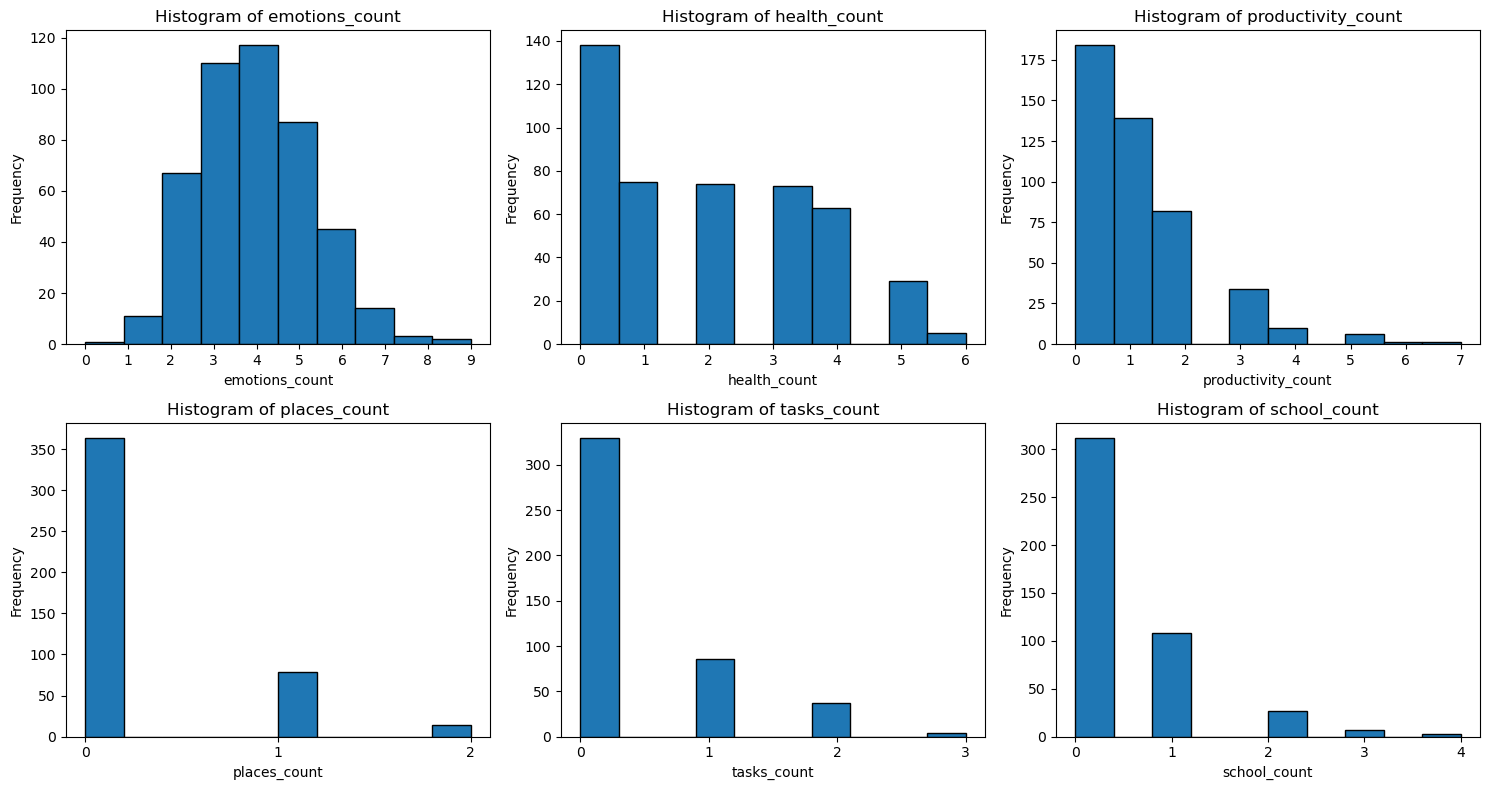

In [18]:
from matplotlib.ticker import MultipleLocator
from math import ceil

cols = ['emotions_count', 'health_count', 'productivity_count', 'places_count', 'tasks_count', 'school_count']

n_plots = len(cols)
    
# Calculate rows and columns
n_cols = min(3, n_plots)
n_rows = ceil(n_plots / n_cols)
    
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    
# Ensure axes is an array
if n_plots == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col], edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].xaxis.set_major_locator(MultipleLocator(1))
    
# Hide empty subplots
for i in range(n_plots, len(axes)):
    axes[i].set_visible(False)
    
plt.tight_layout()
plt.show()

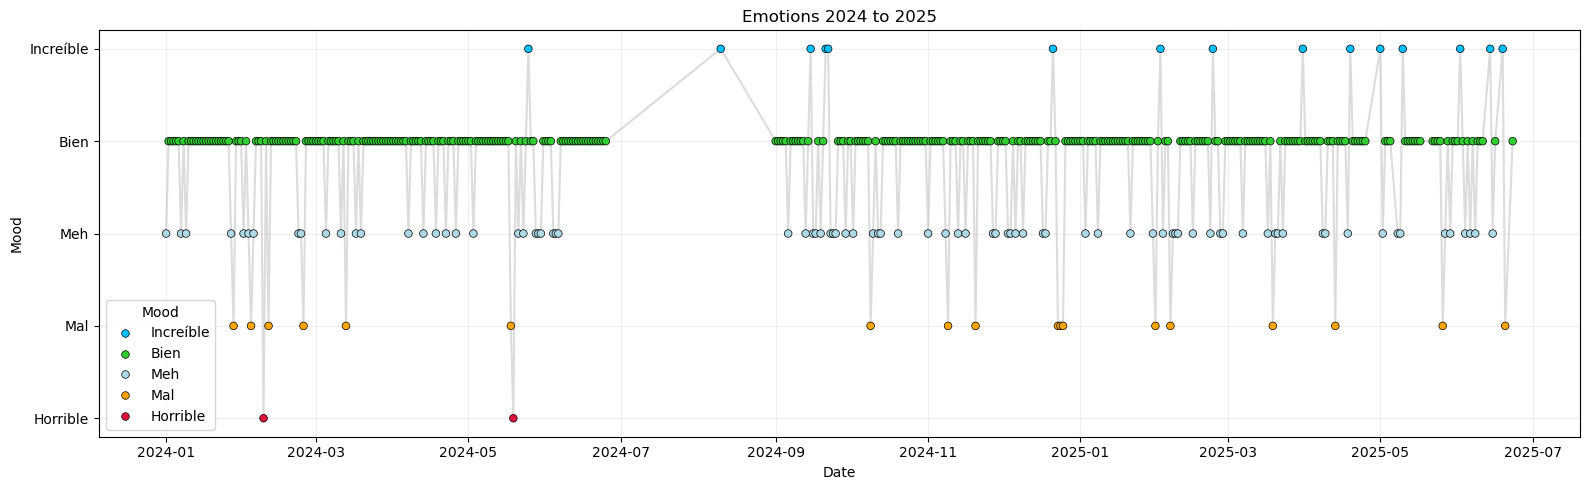

In [19]:
colors = {
    'Horrible': 'crimson',
    'Mal': 'orange',
    'Meh': 'lightblue',
    'Bien': 'limegreen',
    'Increíble': 'deepskyblue'
}

sorted_moods = ['Increíble', 'Bien', 'Meh', 'Mal', 'Horrible']

plt.figure(figsize=(16, 5))
plt.grid(True, alpha=0.2)

plt.xlabel("Date")
plt.ylabel("Mood")
plt.title("Emotions 2024 to 2025")

sns.lineplot(
    data=df,
    x="full_date", 
    y="mood_numeric",
    color="gainsboro",
    zorder=1,
    legend=False
)

sns.scatterplot(
    data=df,
    x="full_date", 
    y="mood_numeric",
    hue="mood",
    hue_order=sorted_moods,
    palette=colors,
    s=30,
    edgecolor="black",
    linewidth=0.5,
    zorder=2,
    legend="full"
)

plt.yticks(range(5), ['Horrible', 'Mal', 'Meh', 'Bien', 'Increíble'])

plt.legend(title="Mood", loc='best')

plt.tight_layout()
plt.show()

In [20]:
# Source - https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
# Posted by cbarrick, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-23, License - CC BY-SA 4.0

import matplotlib as mpl


DAYS = ['Sun', 'Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat']
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


def date_heatmap(series, start=None, end=None, mean=False, ax=None, **kwargs):
    '''Plot a calendar heatmap given a datetime series.

    Arguments:
        series (pd.Series):
            A series of numeric values with a datetime index. Values occurring
            on the same day are combined by sum.
        start (Any):
            The first day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            earliest date in the data.
        end (Any):
            The last day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            latest date in the data.
        mean (bool):
            Combine values occurring on the same day by mean instead of sum.
        ax (matplotlib.Axes or None):
            The axes on which to draw the heatmap. The default is the current
            axes in the :module:`~matplotlib.pyplot` API.
        **kwargs:
            Forwarded to :meth:`~matplotlib.Axes.pcolormesh` for drawing the
            heatmap.

    Returns:
        matplotlib.collections.Axes:
            The axes on which the heatmap was drawn. This is set as the current
            axes in the `~matplotlib.pyplot` API.
    '''
    # Combine values occurring on the same day.
    dates = series.index.floor('D')
    group = series.groupby(dates)
    series = group.mean() if mean else group.sum()

    # Parse start/end, defaulting to the min/max of the index.
    start = pd.to_datetime(start or series.index.min())
    end = pd.to_datetime(end or series.index.max())

    # We use [start, end) as a half-open interval below.
    end += np.timedelta64(1, 'D')

    # Get the previous/following Sunday to start/end.
    # Pandas and numpy day-of-week conventions are Monday=0 and Sunday=6.
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64(7 - end.dayofweek - 1, 'D')

    # Create the heatmap and track ticks.
    num_weeks = (end_sun - start_sun).days // 7
    # heatmap = np.zeros((7, num_weeks))
    heatmap = np.full((7, num_weeks), np.nan)
    ticks = {}  # week number -> month name
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                # heatmap[day, week] = series.get(date, 0)
                heatmap[day, week] = series.get(date, np.nan)

    # Get the coordinates, offset by 0.5 to align the ticks.
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    # Plot the heatmap. Prefer pcolormesh over imshow so that the figure can be
    # vectorized when saved to a compatible format. We must invert the axis for
    # pcolormesh, but not for imshow, so that it reads top-bottom, left-right.
    ax = ax or plt.gca()
    mesh = ax.pcolormesh(x, y, heatmap, **kwargs)
    ax.invert_yaxis()

    # Set the ticks.
    ax.set_xticks(list(ticks.keys()))
    ax.set_xticklabels(list(ticks.values()))
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(DAYS)

    # Set the current image and axes in the pyplot API.
    plt.sca(ax)
    plt.sci(mesh)

    return ax

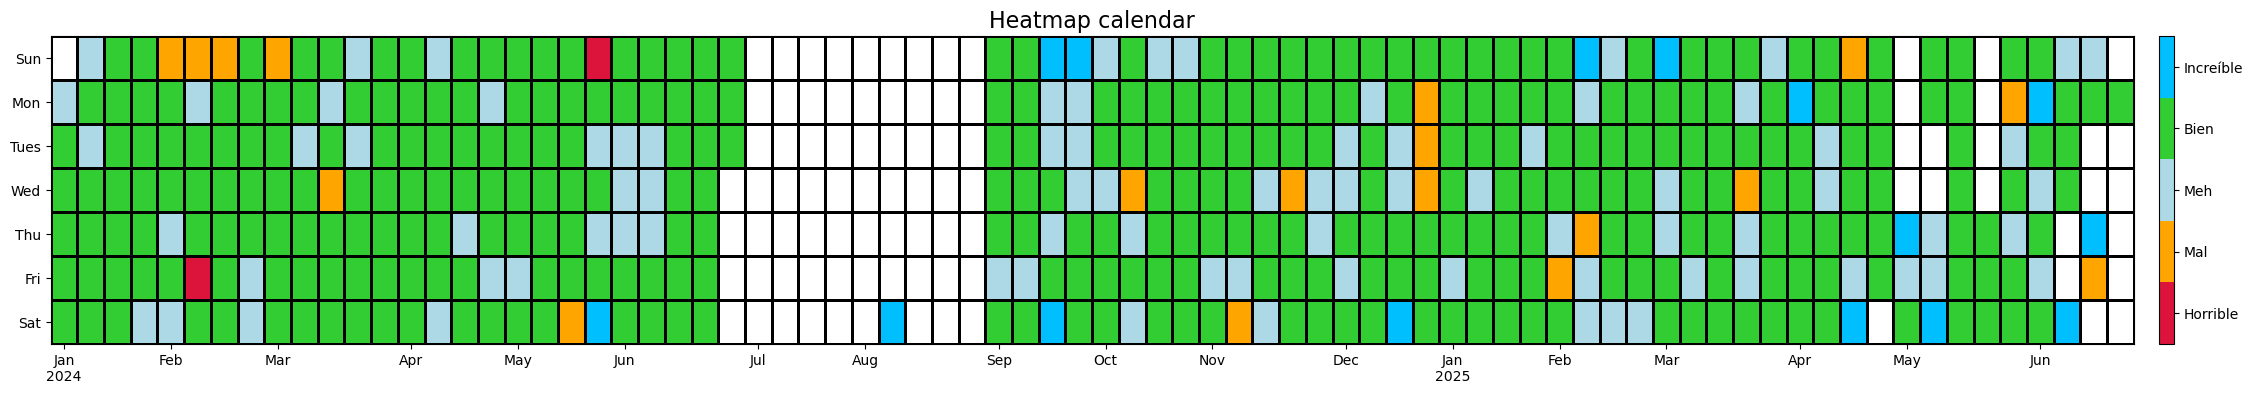

In [21]:
from matplotlib.colors import ListedColormap

series_data = df.set_index('full_date')['mood_numeric']

# Customized colors
colors = ['crimson', 'orange', 'lightblue', 'limegreen', 'deepskyblue']
my_cmap = ListedColormap(colors)

plt.figure(figsize=(32, 4))

ax = date_heatmap(
    series_data, 
    cmap=my_cmap,
    edgecolor='black',
    linewidth=0.8,
    mean=True
)

plt.clim(-0.5, 4.5) 
cbar = plt.colorbar(ticks=range(5), pad=0.01)
cbar.ax.set_yticklabels(['Horrible', 'Mal', 'Meh', 'Bien', 'Increíble'])

plt.title("Heatmap calendar", fontsize=16)
plt.show()

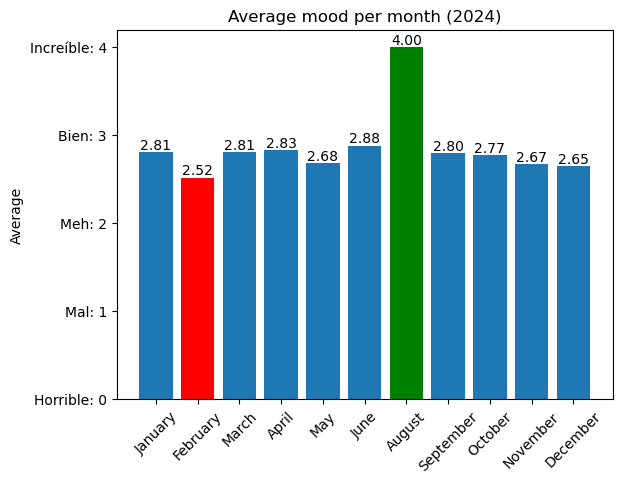

In [22]:
import calendar

mean_month = df[df['year'] == 2024].groupby('month')['mood_numeric'].mean()

max_value = mean_month.max()
min_value = mean_month.min()
max_index = mean_month.idxmax()
min_index = mean_month.idxmin()

colors = ['green' if i == max_index else 'red' if i == min_index else 'C0' for i in mean_month.index]

bars = plt.bar([calendar.month_name[i].capitalize() for i in mean_month.index], mean_month.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_month.values])

plt.ylabel('Average')
plt.title('Average mood per month (2024)')
plt.yticks(range(5), ['Horrible: 0', 'Mal: 1', 'Meh: 2', 'Bien: 3', 'Increíble: 4'])
plt.xticks(rotation=45)

plt.show()

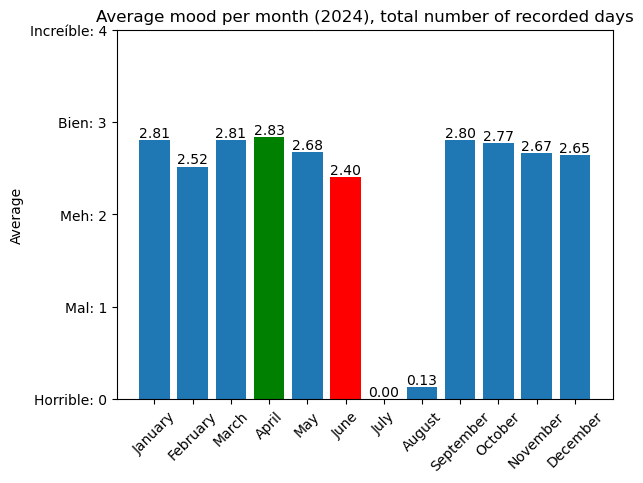

In [23]:
# Average mood per month (2024), based on the total number of recorded days
size_month = pd.Series({1: 31, 2: 29, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31})

sum_month = df[df['year'] == 2024].groupby('month')['mood_numeric'].sum()
    
mean_month = sum_month / size_month
mean_month = mean_month.fillna(0)
max_value = mean_month.max()
max_index = mean_month.idxmax()

colors = ['green' if i == max_index else 'red' if i == 6 else 'C0' for i in mean_month.index]

bars = plt.bar([calendar.month_name[i].capitalize() for i in mean_month.index], mean_month.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_month.values])

plt.ylabel('Average')
plt.title('Average mood per month (2024), total number of recorded days')
plt.yticks(range(5), ['Horrible: 0', 'Mal: 1', 'Meh: 2', 'Bien: 3', 'Increíble: 4'])
plt.xticks(rotation=45)
    
plt.show()

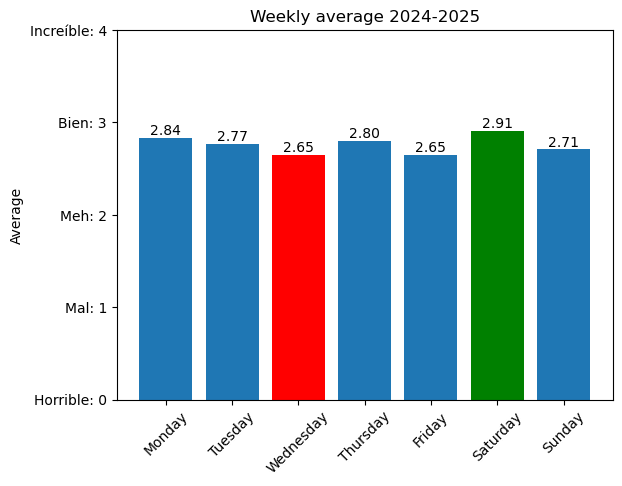

In [24]:
mean_weekday = df.groupby('weekday')['mood_numeric'].mean()
mean_weekday = mean_weekday.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

max_value = mean_weekday.max()
min_value = mean_weekday.min()
max_index = mean_weekday.idxmax()
min_index = mean_weekday.idxmin()
    
colors = ['green' if i == max_index else 'red' if i == min_index else 'C0' for i in mean_weekday.index]
bars = plt.bar(mean_weekday.index, mean_weekday.values, color=colors)
plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_weekday.values])

plt.ylabel('Average')
plt.title('Weekly average 2024-2025')
plt.xticks(rotation=45)
plt.yticks(range(5), ['Horrible: 0', 'Mal: 1', 'Meh: 2', 'Bien: 3', 'Increíble: 4'])
    
plt.show()

## Respuesta a preguntas específicas

### 1. Cadenas de Markov
Probabilidad del mood del siguiente día 

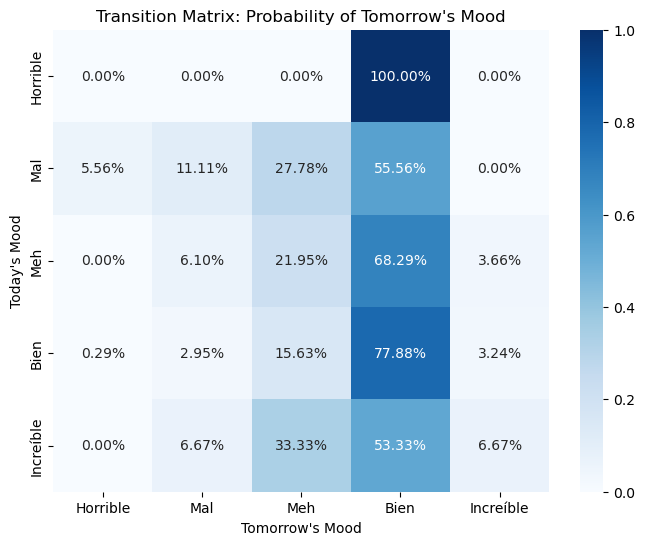

In [25]:
# Create a column for tomorrow's mood
df['next_day_mood'] = df['mood'].shift(-1)

# Crosstab normalized by row (index) gives probabilities
transition_matrix = pd.crosstab(
    df['mood'], 
    df['next_day_mood'], 
    normalize='index' # This turns counts into probabilities (0-1)
)

# Reorder for logic
order = ['Horrible', 'Mal', 'Meh', 'Bien', 'Increíble']
transition_matrix = transition_matrix.reindex(index=order, columns=order)

plt.figure(figsize=(8, 6))

sns.heatmap(transition_matrix, annot=True, fmt=".2%", cmap="Blues")

plt.title("Transition Matrix: Probability of Tomorrow's Mood")
plt.ylabel("Today's Mood")
plt.xlabel("Tomorrow's Mood")

plt.show()

### 2. Índice de volatilidad
¿Qué tan estable he sido emocionalmente últimamente?

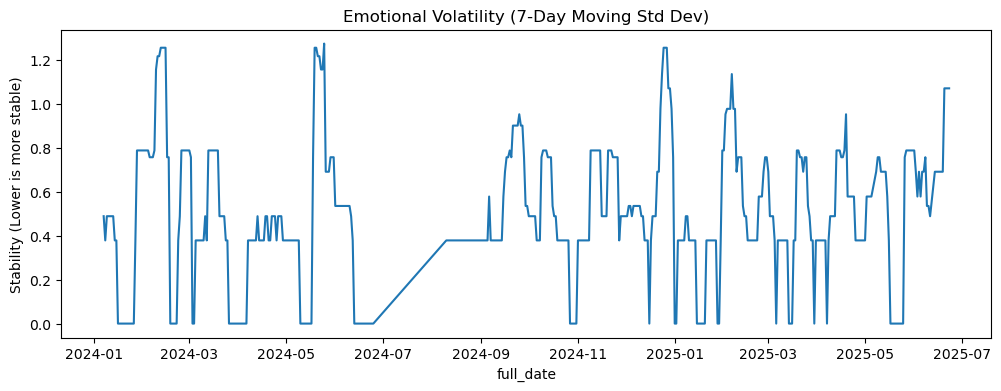

In [26]:
# Rolling window of 7 days
df['volatility'] = df['mood_numeric'].rolling(window=7).std()

plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='full_date', y='volatility')
plt.title("Emotional Volatility (7-Day Moving Std Dev)")
plt.ylabel("Stability (Lower is more stable)")

plt.show()

In [27]:
df['volatility'].describe()

count    451.000000
mean       0.496995
std        0.309912
min        0.000000
25%        0.377964
50%        0.487950
75%        0.755929
max        1.272418
Name: volatility, dtype: float64

Insight: Los picos altos indican semanas caóticas (subidas y bajadas bruscas), los valles indican semanas monótonas (siempre igual, sea bueno o malo).

### 3. "The Perfect Day"
¿Cómo se ve un día 'Increíble' en promedio?

In [28]:
# Filter only the best days
perfect_days = df[df['mood'] == 'Increíble']

print("Días perfectos: ", perfect_days.shape[0])

# Describe the numeric columns for these specific days
stats = perfect_days[[
    'activities_count', 'emotions_count', 'health_count', 'productivity_count', 'places_count',
    'tasks_count', 'school_count', 'positive_emotions_count', 'neutral_emotions_count', 'negative_emotions_count'
]].describe()
stats_o = perfect_days[['sleep_level']].describe()
print("\nNumber of activities & per category")
print(stats)
print(stats_o)

# Multi-hot, sum them to see prevalence
# Activities columns
activities_subset = perfect_days.iloc[:, 22:86]
top_activities = activities_subset.sum().sort_values(ascending=False)

print("\nTop best activities")
print(top_activities.head(15))

Días perfectos:  15

Number of activities & per category
       activities_count  emotions_count  health_count  productivity_count  \
count         15.000000       15.000000     15.000000           15.000000   
mean           7.733333        4.400000      1.200000            0.200000   
std            2.218966        1.352247      1.424279            0.774597   
min            2.000000        1.000000      0.000000            0.000000   
25%            7.000000        4.000000      0.000000            0.000000   
50%            8.000000        5.000000      1.000000            0.000000   
75%            9.000000        5.000000      2.500000            0.000000   
max           11.000000        6.000000      4.000000            3.000000   

       places_count  tasks_count  school_count  positive_emotions_count  \
count     15.000000    15.000000          15.0                15.000000   
mean       0.933333     0.066667           0.0                 3.533333   
std        0.703732     

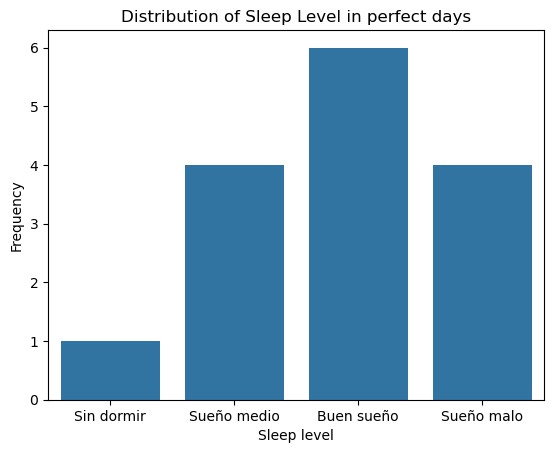

In [29]:
sns.countplot(perfect_days, x="sleep_level")
  
plt.xlabel('Sleep level')
plt.ylabel('Frequency') 
plt.title('Distribution of Sleep Level in perfect days')

plt.show()

### 4. Rachas
¿Cuál ha sido mi racha más larga de días buenos?

In [30]:
# Define "Good Day" as Mood >= 3 (Bien or Increíble)
condition = df['mood_numeric'] >= 3

# condition != condition.shift() detects changes
# cumsum() gives a unique ID to each "block" of days
# Group by that ID and count
streaks = df.groupby((condition != condition.shift()).cumsum()).cumcount() + 1

# Only keep the streaks where the condition was actually True
good_streaks = streaks[condition]

print(f"Longest streak of good days: {good_streaks.max()} days")
print(f"Average streak length: {good_streaks.mean():.2f} days")

Longest streak of good days: 25 days
Average streak length: 5.12 days


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 88 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   full_date                457 non-null    datetime64[ns]
 1   weekday                  457 non-null    object        
 2   time                     457 non-null    object        
 3   mood                     457 non-null    object        
 4   activities               457 non-null    object        
 5   mood_numeric             457 non-null    int64         
 6   month                    457 non-null    int64         
 7   year                     457 non-null    int64         
 8   weekday_numeric          457 non-null    int64         
 9   time_decimal             457 non-null    float64       
 10  sleep_level              457 non-null    object        
 11  sleep_level_numeric      457 non-null    int64         
 12  activities_count         457 non-nul